In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/szeged-weather/weatherHistory.csv")

# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.shape

(96453, 12)

In [5]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [6]:
df=df.rename(columns={'Formatted Date':'Date','Precip Type':'Precip_Type',
                      'Temperature (C)':'Temperature',
                      'Apparent Temperature (C)':'Apparent_Temperature',
                     'Wind Speed (km/h)':'Wind_Speed',
                     'Wind Bearing (degrees)':'Wind_Bearing',
                     'Visibility (km)':'Visibility',
                     'Loud Cover':'Loud_Cover',
                     'Pressure (millibars)':'Pressure',
                     'Daily Summary':'Daily_Summary'})
df

,Date,Summary,Precip_Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [7]:
df.dtypes

Date                     object
Summary                  object
Precip_Type              object
Temperature             float64
Apparent_Temperature    float64
Humidity                float64
Wind_Speed              float64
Wind_Bearing            float64
Visibility              float64
Loud_Cover              float64
Pressure                float64
Daily_Summary            object
dtype: object

Data type of "Date" is object so will convert it into datetime

In [8]:
# The datetime object will be in UTC timezone.
#This is useful for standardizing time across different timezones and for performing calculations involving time.
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S.%f %z', utc=True)

In [9]:
# Extract days , month, and year features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Date,Summary,Precip_Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary,Day,Month,Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,31,3,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,31,3,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,1,4,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,1,4,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,1,4,2006


In [10]:
df.dtypes


Date                    datetime64[ns, UTC]
Summary                              object
Precip_Type                          object
Temperature                         float64
Apparent_Temperature                float64
Humidity                            float64
Wind_Speed                          float64
Wind_Bearing                        float64
Visibility                          float64
Loud_Cover                          float64
Pressure                            float64
Daily_Summary                        object
Day                                   int32
Month                                 int32
Year                                  int32
dtype: object

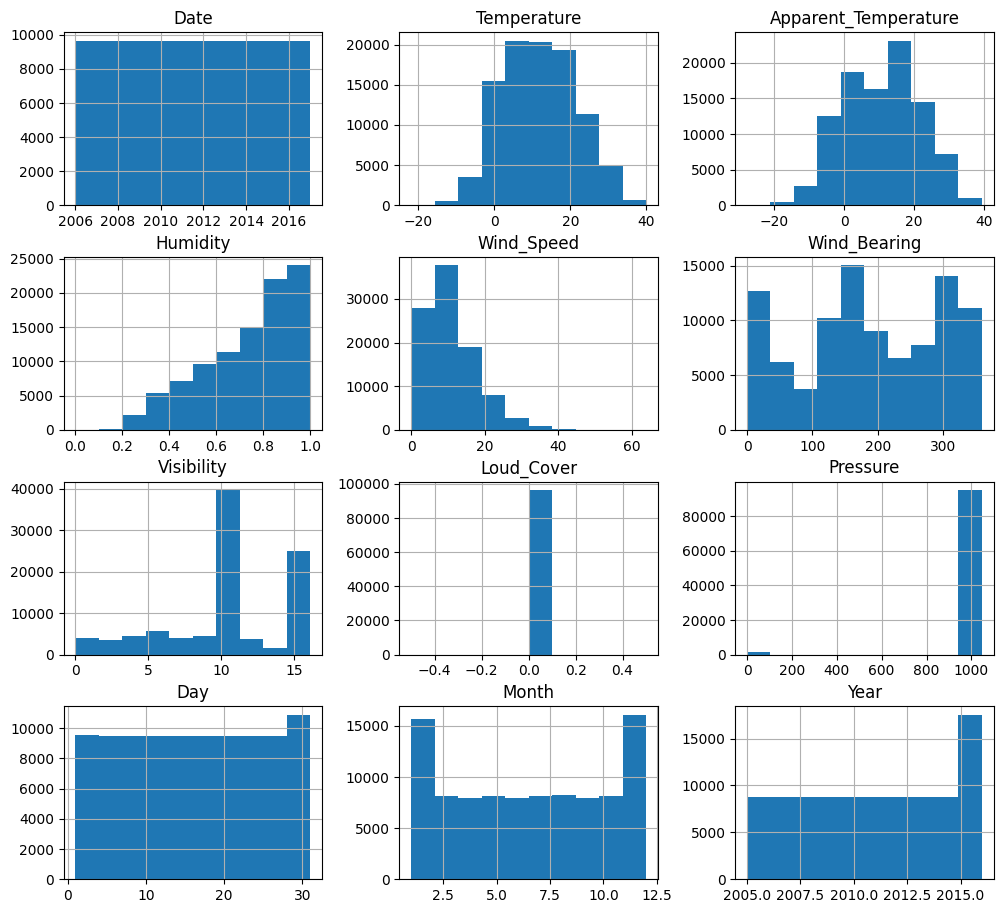

In [11]:
df.hist(figsize=(12, 11))
plt.show()

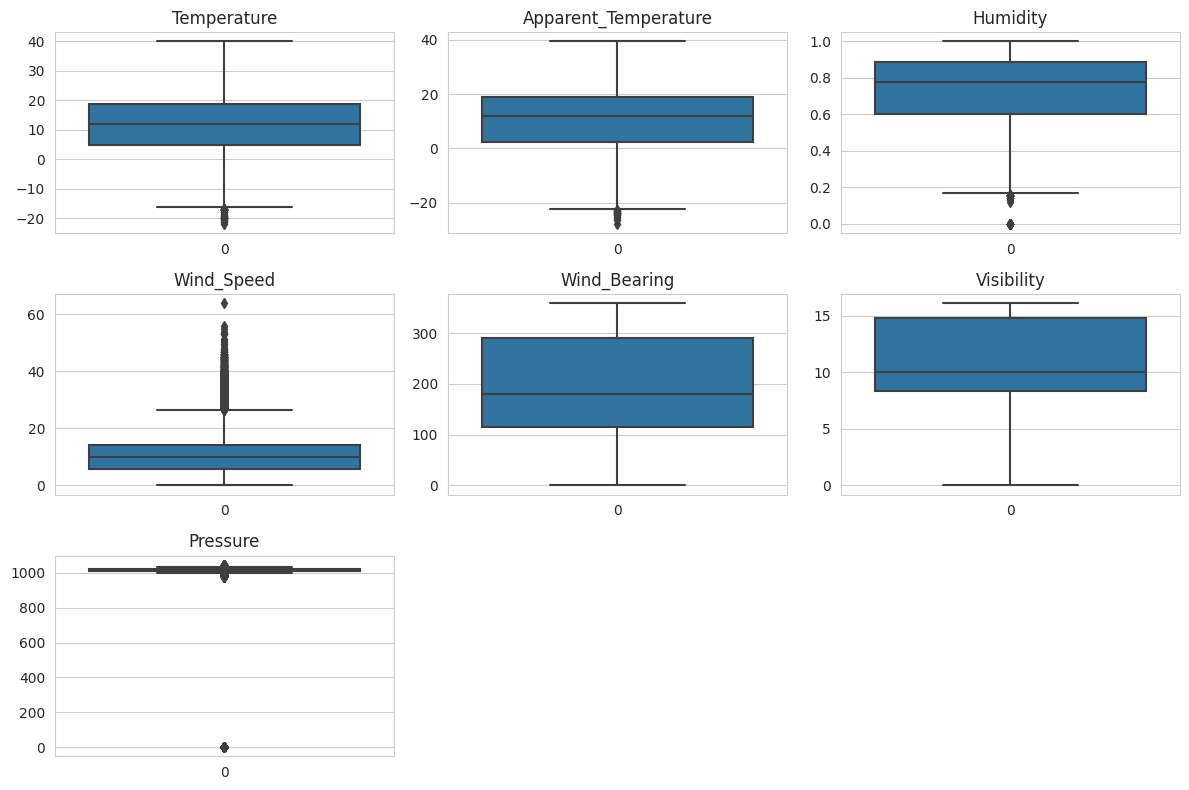

In [12]:
# As data has outlires.
columns_to_plot = ['Temperature', 'Apparent_Temperature', 'Humidity', 'Wind_Speed',
                   'Wind_Bearing', 'Visibility', 'Pressure']

# Creating boxplots for each column
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # Set the style of the plot

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 3, i)  # Create subplots
    sns.boxplot(df[column])
    plt.title(column)  # Set title for each subplot

plt.tight_layout()
plt.show()

In [13]:
#check for null values
df.isnull().sum()

Date                      0
Summary                   0
Precip_Type             517
Temperature               0
Apparent_Temperature      0
Humidity                  0
Wind_Speed                0
Wind_Bearing              0
Visibility                0
Loud_Cover                0
Pressure                  0
Daily_Summary             0
Day                       0
Month                     0
Year                      0
dtype: int64

In [14]:
#check for dublicate values
df.duplicated().sum()

24

In [15]:
numeric = df.select_dtypes(include='float64')
numeric.columns

Index(['Temperature', 'Apparent_Temperature', 'Humidity', 'Wind_Speed',
       'Wind_Bearing', 'Visibility', 'Loud_Cover', 'Pressure'],
      dtype='object')

In [16]:
corr_matrix = numeric.corr()
corr_matrix["Temperature"].sort_values(ascending=False)

Temperature             1.000000
Apparent_Temperature    0.992629
Visibility              0.392847
Wind_Bearing            0.029988
Wind_Speed              0.008957
Pressure               -0.005447
Humidity               -0.632255
Loud_Cover                   NaN
Name: Temperature, dtype: float64

<Axes: >

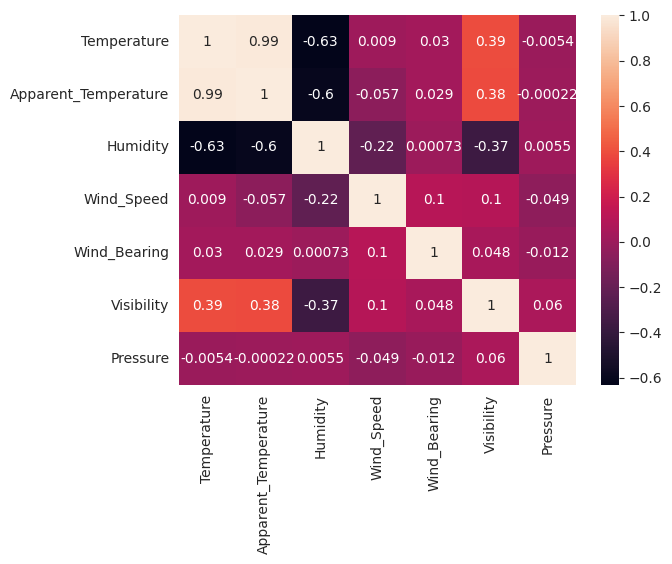

In [17]:
numeric = numeric.drop('Loud_Cover', axis=1)
sns.heatmap(numeric.corr(), annot=True)

# Linear Modeling before Cleaning

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
# Separate the independent variable (feature) and dependent variable (target)
x = df[['Humidity']] # Independent variable (feature) - Humidity
y = df['Temperature'] # Dependent variable (target) - Temperature


In [20]:
# Split the dataset into training and testing sets
# Here, 80% of the data is used for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [21]:
# Initialize a Linear Regression model
reg = LinearRegression()
# Fit the model using the training data
reg.fit(x_train,y_train)


LinearRegression()

In [22]:
# Predict the target variable (Temperature) using the trained model
Y_hat = reg.predict(x_train)

$R^2_adj = 1- (1- R^2)*\frac{n-1}{n-p}$


In [23]:
# Calculate Mean Squared Error (MSE) using predicted values and actual values from the train set
LinearRegression_MSE = mean_squared_error(y_train,Y_hat)

# Calculate R-squared score using predicted values and actual values from the train set
LinearRegression_R2 = reg.score(x_train,y_train)

#calculate the adjusted R^2 using the rule above
R2_adj =1 - (1 - LinearRegression_R2) * ((len(y_train) - 1) / (len(y_train) - 2))
print(LinearRegression_MSE)
print(LinearRegression_R2)
print(R2_adj)

54.531372239547146
0.4007432667666295
0.40073550034966166


R^2 is just 4.0 so we the model need more feature and cleaning to enhance the accuracy

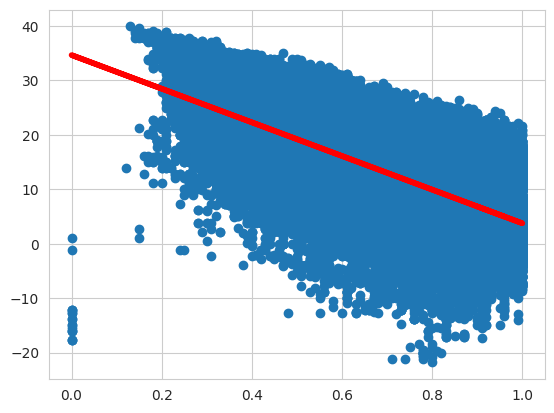

In [24]:
plt.scatter(x_train,y_train)
plt.plot(x_train,Y_hat,lw=4,c='r',label='reg')
plt.show()

In [25]:
# Add 'Visibility' as another feature to the independent variables
x = df[['Humidity','Visibility']]
y = df['Temperature']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)
reg = LinearRegression()
reg.fit(x_train,y_train)
Y_hat = reg.predict(x_train)


In [27]:
# LinearRegression_MAE = np.mean(np.absolute(Y_hat - y_test))
LinearRegression_MSE = mean_squared_error(y_train,Y_hat)
LinearRegression_R2 = reg.score(x_train,y_train)
print("R2_adj: ",1 - (1 - LinearRegression_R2) * ((len(y_train) - 1) / (len(y_train) - 3)))
# print("MAE: ",LinearRegression_MAE)
print("MSE: ",LinearRegression_MSE)
print("R2: ",LinearRegression_R2)

R2_adj:  0.43012743603913317
MSE:  51.85611726694826
R2:  0.43014220703909334


increased from 4.0 to 4.3 which indicate how important the feature of Visibility is

In [28]:
# Add 'Wind_Speed' as another feature to the independent variables
x = df[['Humidity','Visibility','Wind_Speed']]
y = df['Temperature']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)


reg = LinearRegression()
reg.fit(x_train,y_train)

Y_hat = reg.predict(x_train)

# LinearRegression_MAE = np.mean(np.absolute(Y_hat - y_test))
LinearRegression_MSE = mean_squared_error(y_train,Y_hat)
LinearRegression_R2 = reg.score(x_train,y_train)
print("R2_adj: ",1 - (1 - LinearRegression_R2) * ((len(y_train) - 1) / (len(y_train) - 4)))
# print("MAE: ",LinearRegression_MAE)
print("MSE: ",LinearRegression_MSE)
print("R2: ",LinearRegression_R2)

R2_adj:  0.44965393637848616
MSE:  50.0786350268687
R2:  0.44967533369307344


In [29]:
# Add 'Wind_Bearing' and Wind_Speed
x = df[['Humidity','Visibility','Wind_Speed', 'Wind_Bearing']]
y = df['Temperature']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

reg = LinearRegression()
reg.fit(x_train,y_train)


Y_hat = reg.predict(x_train)

# LinearRegression_MAE = np.mean(np.absolute(Y_hat - y_test))
LinearRegression_MSE = mean_squared_error(y_train,Y_hat)
LinearRegression_R2 = reg.score(x_train,y_train)
print("R2_adj: ",1 - (1 - LinearRegression_R2) * ((len(y_train) - 1) / (len(y_train) - 5)))
# print("MAE: ",LinearRegression_MAE)
print("MSE: ",LinearRegression_MSE)
print("R2: ",LinearRegression_R2)

R2_adj:  0.4508146033324769
MSE:  49.97237268762454
R2:  0.4508430729166797


In [30]:
x = df[['Humidity','Visibility','Wind_Speed','Wind_Bearing','Pressure']]
y = df['Temperature']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)



reg = LinearRegression()
reg.fit(x_train,y_train)


Y_hat = reg.predict(x_train)
Y_hat


# LinearRegression_MAE = np.mean(np.absolute(Y_hat - y_test))
LinearRegression_MSE = mean_squared_error(y_train,Y_hat)
LinearRegression_R2=reg.score(x_train,y_train)
print("R2_adj: ",1 - (1 - LinearRegression_R2) * ((len(y_train) - 1) / (len(y_train) - 6 )))
# print("MAE: ",LinearRegression_MAE)
print("MSE: ",LinearRegression_MSE)
print("R2: ",LinearRegression_R2)

R2_adj:  0.45123014213445833
MSE:  49.93391412248181
R2:  0.451265702187974


# Data Cleaning

In [31]:
#Replace null values
df['Precip_Type']=df.apply(lambda row:'rain' if pd.isnull(row['Precip_Type']) and row['Temperature']>0 else ('snow' if pd.isnull(row['Precip_Type']) and row['Temperature']<=0 else row['Precip_Type']),axis=1)

In [32]:
df.isnull().sum()

Date                    0
Summary                 0
Precip_Type             0
Temperature             0
Apparent_Temperature    0
Humidity                0
Wind_Speed              0
Wind_Bearing            0
Visibility              0
Loud_Cover              0
Pressure                0
Daily_Summary           0
Day                     0
Month                   0
Year                    0
dtype: int64

In [33]:
df.drop_duplicates(inplace=True)


In [34]:
df.duplicated().sum()

0

In [35]:
# Identify potential outliers and remove it
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate the IQR for each numeric column
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
threshold = 1.5

# Identify outliers
outliers = (numeric_data < (Q1 - threshold * IQR)) | (numeric_data > (Q3 + threshold * IQR))

# Print rows with outliers
df=df[~outliers.any(axis=1)]

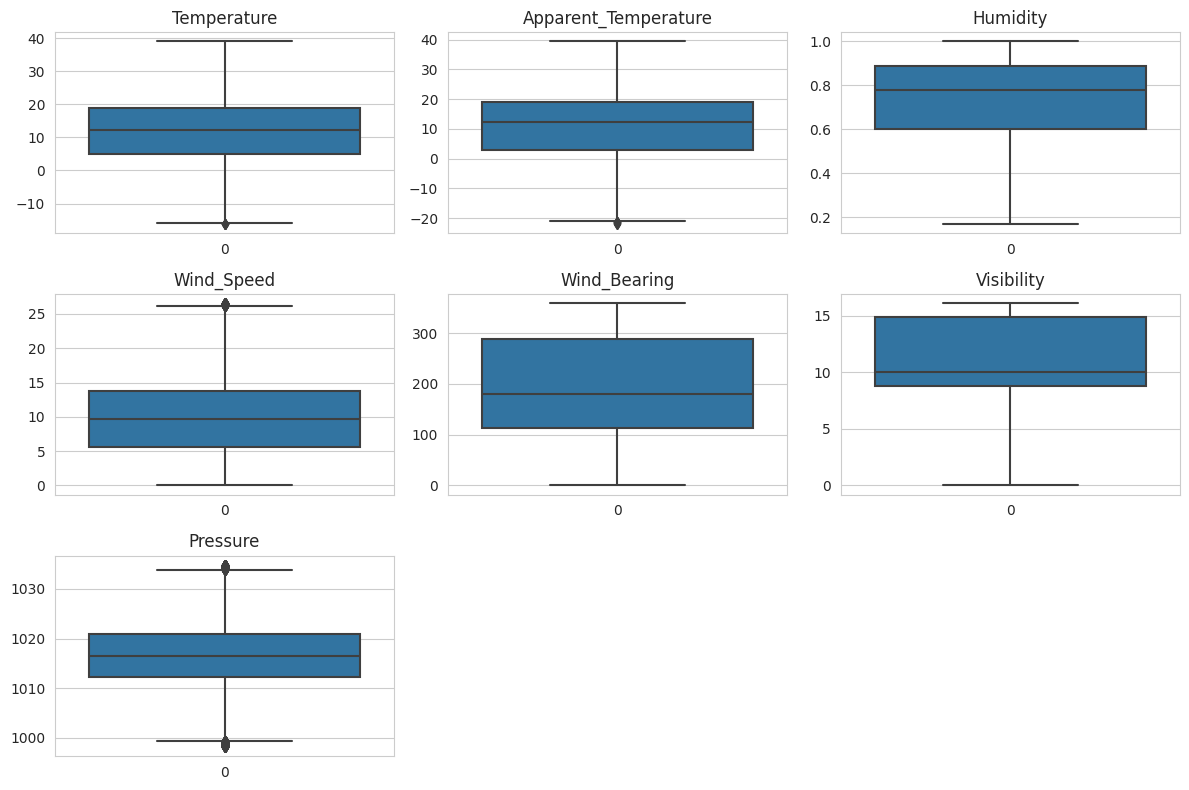

In [36]:
# As data has outlires.
columns_to_plot = ['Temperature', 'Apparent_Temperature', 'Humidity', 'Wind_Speed',
                   'Wind_Bearing', 'Visibility', 'Pressure']

# Creating boxplots for each column
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # Set the style of the plot

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 3, i)  # Create subplots
    sns.boxplot(df[column])
    plt.title(column)  # Set title for each subplot

plt.tight_layout()
plt.show()

IF we drop any more outliers, there are another outliers will appeare in another columns, so it is the optimal level for removing outliers

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89241 entries, 0 to 96452
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Date                  89241 non-null  datetime64[ns, UTC]
 1   Summary               89241 non-null  object             
 2   Precip_Type           89241 non-null  object             
 3   Temperature           89241 non-null  float64            
 4   Apparent_Temperature  89241 non-null  float64            
 5   Humidity              89241 non-null  float64            
 6   Wind_Speed            89241 non-null  float64            
 7   Wind_Bearing          89241 non-null  float64            
 8   Visibility            89241 non-null  float64            
 9   Loud_Cover            89241 non-null  float64            
 10  Pressure              89241 non-null  float64            
 11  Daily_Summary         89241 non-null  object             
 12  Day      

In [38]:
df.describe()

,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Day,Month,Year
count,89241.000000,89241.000000,89241.000000,89241.000000,89241.00000,89241.000000,89241.0,89241.000000,89241.000000,89241.000000,89241.000000
mean,12.356680,11.374165,0.734420,10.148335,186.52607,10.457028,0.0,1016.782170,15.656470,6.536894,2011.037707
std,9.453709,10.545075,0.195876,5.833784,107.25386,4.172312,0.0,6.762156,8.793009,3.364914,3.158335
min,-16.111111,-21.922222,0.170000,0.000000,0.00000,0.000000,0.0,998.120000,1.000000,1.000000,2005.000000
25%,5.000000,2.955556,0.600000,5.618900,113.00000,8.774500,0.0,1012.350000,8.000000,4.000000,2008.000000
50%,12.288889,12.288889,0.780000,9.676100,180.00000,10.046400,0.0,1016.580000,16.000000,7.000000,2011.000000
75%,19.000000,19.000000,0.890000,13.829900,289.00000,14.908600,0.0,1020.950000,23.000000,9.000000,2014.000000
max,38.983333,39.344444,1.000000,26.581100,359.00000,16.100000,0.0,1034.870000,31.000000,12.000000,2016.000000


# Distribution for each numerical feature

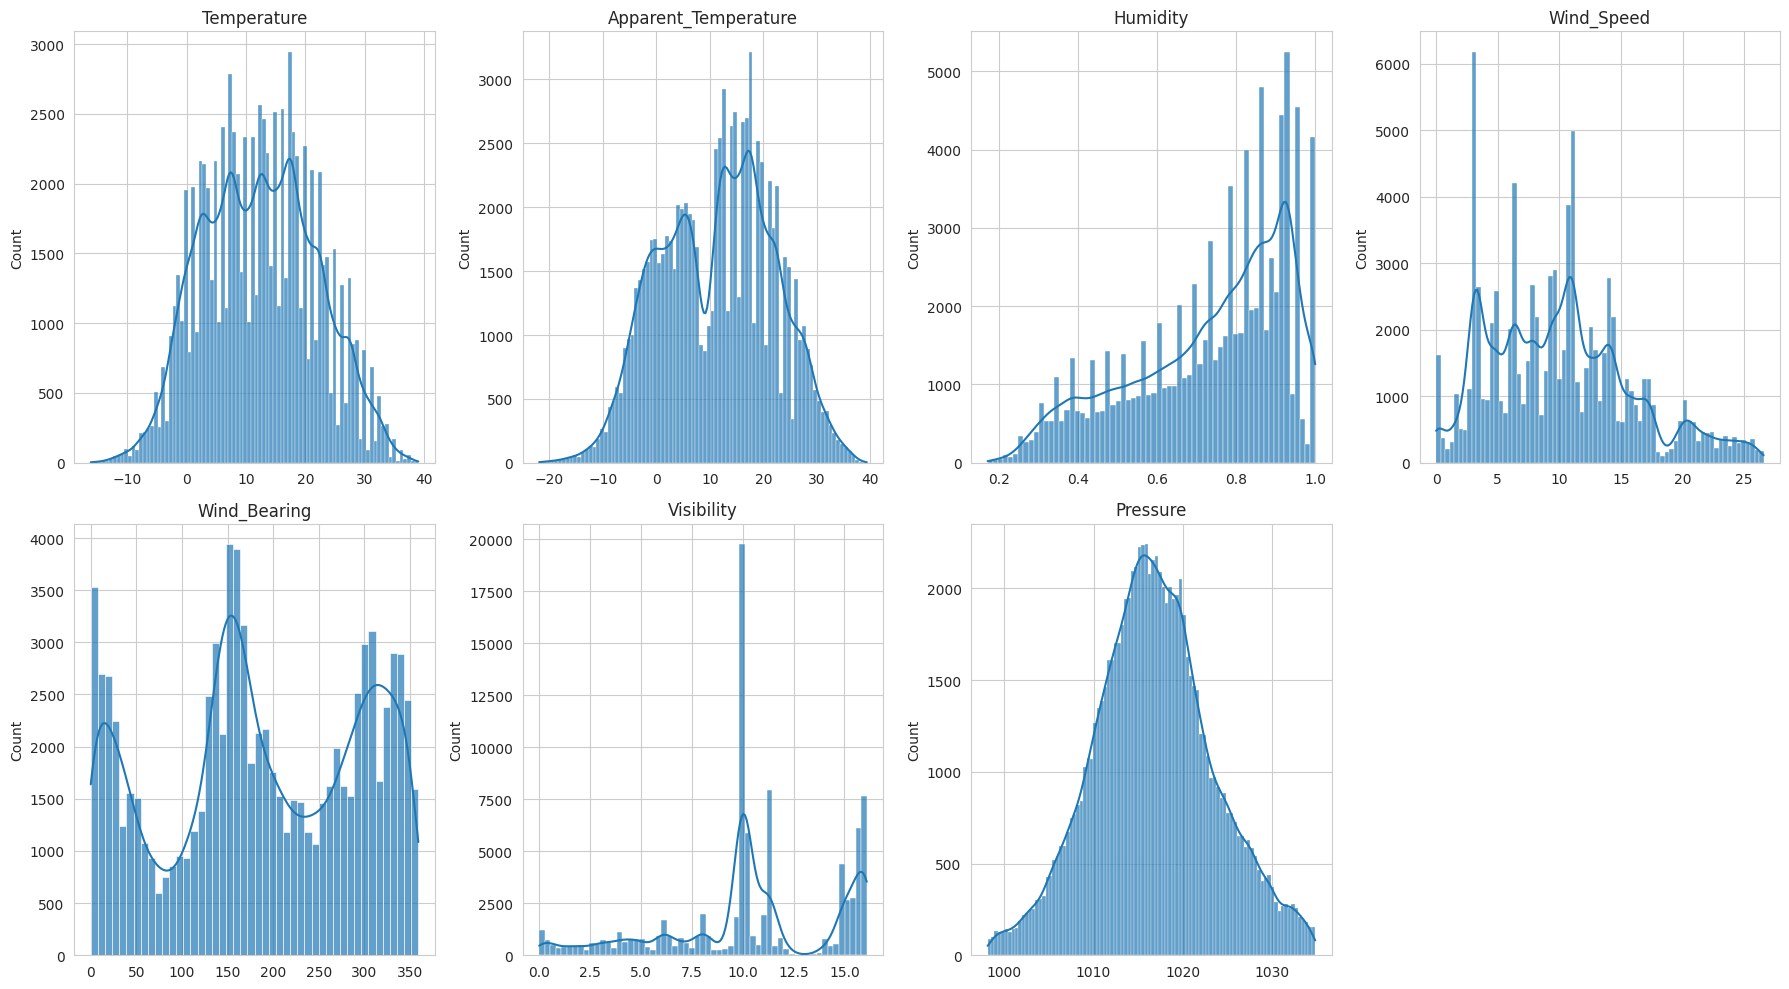

In [39]:

quantitative_columns = ['Temperature', 'Apparent_Temperature', 'Humidity',
                        'Wind_Speed', 'Wind_Bearing', 'Visibility', 'Pressure']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, column in enumerate(quantitative_columns):
    sns.histplot(df[column], kde=True, ax=axes[i], alpha=0.7)
    axes[i].set_title(column)
    axes[i].set_xlabel('')

for j in range(len(quantitative_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

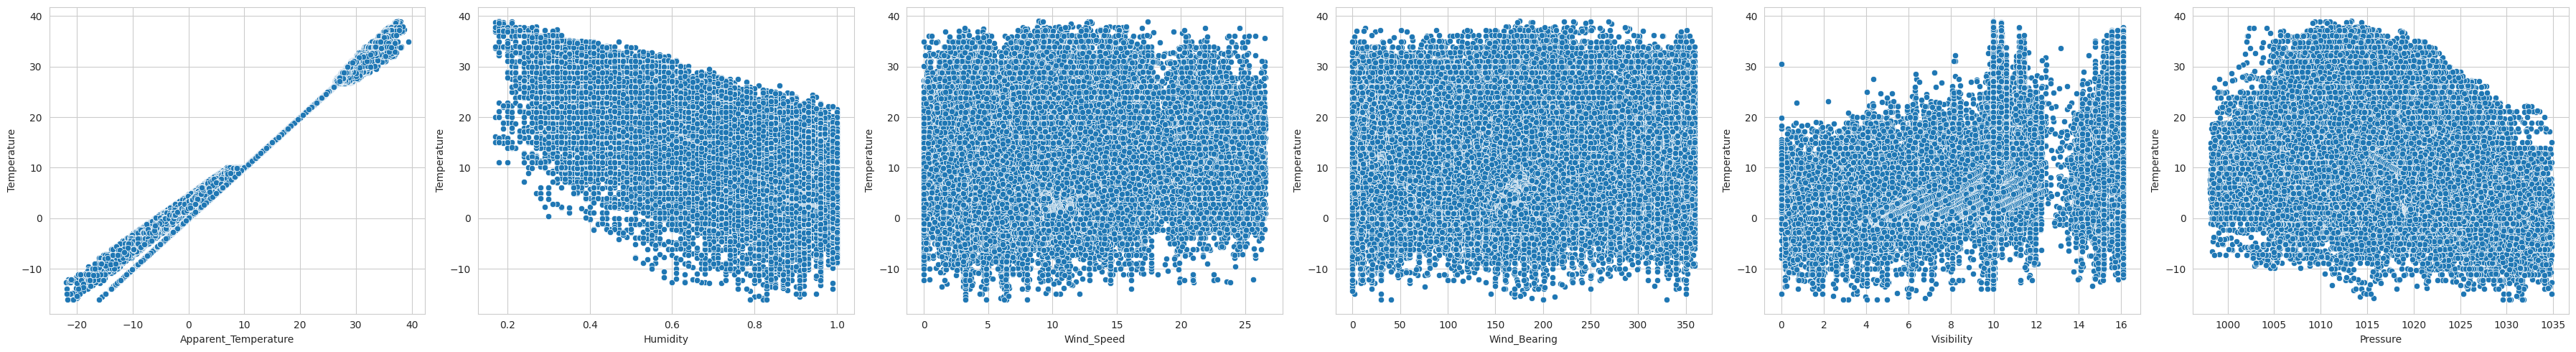

In [40]:
columns_to_plot = ['Temperature', 'Apparent_Temperature', 'Humidity', 'Wind_Speed',
                   'Wind_Bearing', 'Visibility', 'Pressure']

fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot) - 1,
                         figsize=(6 * (len(columns_to_plot) - 1), 5))
feature_to_plot = 'Temperature'

# Loop over each feature (except the selected one) and create scatter plots
for i, col in enumerate(columns_to_plot):
    if col != feature_to_plot:
        sns.scatterplot(x=col, y=feature_to_plot, data=df, ax=axes[i if i < columns_to_plot.index(feature_to_plot) else i - 1])
        axes[i if i < columns_to_plot.index(feature_to_plot) else i - 1].set_xlabel(col)
        axes[i if i < columns_to_plot.index(feature_to_plot) else i - 1].set_ylabel(feature_to_plot)

plt.tight_layout()
plt.show()

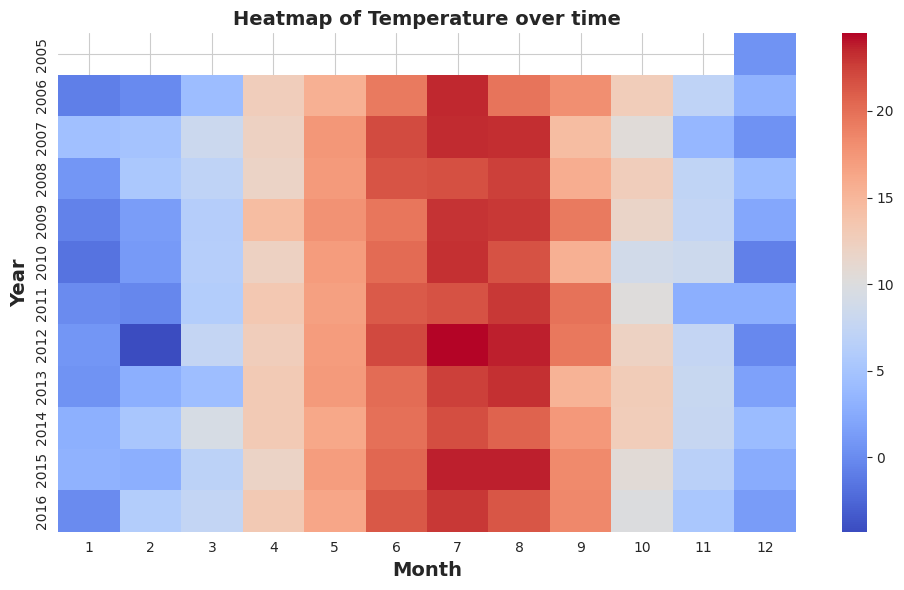

In [41]:
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot_table(index='Year',columns='Month',values='Temperature')
sns.heatmap(data=heatmap_data,cmap='coolwarm')
plt.title('Heatmap of Temperature over time',fontsize=14,fontweight='bold')
plt.xlabel('Month',fontsize=14,fontweight='bold')
plt.ylabel('Year',fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

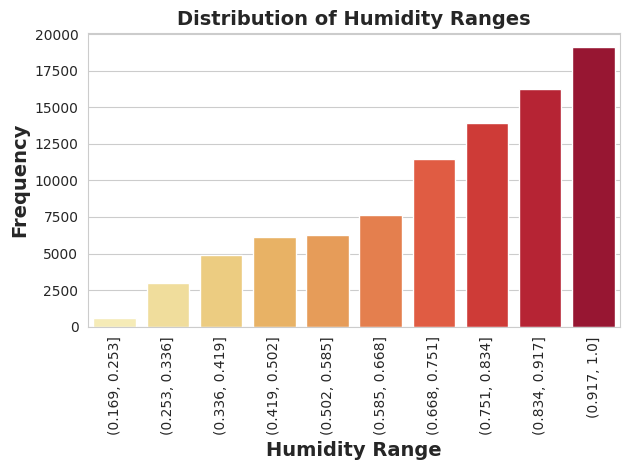

In [42]:
humidity_bins = pd.cut(df['Humidity'], bins=10)

sns.countplot(x=humidity_bins, palette='YlOrRd')

plt.xlabel('Humidity Range', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Humidity Ranges', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

Correlation between Temperature and the numeric features after cleaning

In [43]:
numeric = df.select_dtypes(include='float64')
numeric = numeric.drop('Loud_Cover', axis=1)
numeric.columns

Index(['Temperature', 'Apparent_Temperature', 'Humidity', 'Wind_Speed',
       'Wind_Bearing', 'Visibility', 'Pressure'],
      dtype='object')

In [44]:
corr_matrix = numeric.corr()
corr_matrix["Temperature"].sort_values(ascending=False)

Temperature             1.000000
Apparent_Temperature    0.993486
Visibility              0.387993
Wind_Bearing            0.025455
Wind_Speed              0.020134
Pressure               -0.304397
Humidity               -0.647456
Name: Temperature, dtype: float64

<Axes: >

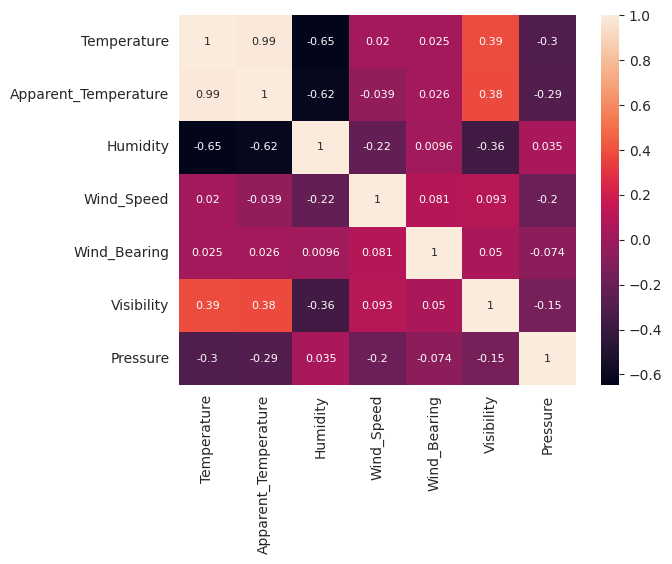

In [45]:
sns.heatmap(numeric.corr(), annot=True, annot_kws={'size': 8})

# Enhanced Linear modeling after Cleaning

In [46]:
# Separate the independent variable (feature) and dependent variable (target)
x = df[['Humidity']] # Independent variable (feature) - Humidity
y = df['Temperature'] # Dependent variable (target) - Temperature

In [47]:
# Split the dataset into training and testing sets
# Here, 80% of the data is used for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [48]:
# Initialize a Linear Regression model
reg = LinearRegression()
# Fit the model using the training data
reg.fit(x_train,y_train)

LinearRegression()

In [49]:
# Predict the target variable (Temperature) using the trained model
Y_hat = reg.predict(x_train)

$R^2_adj = 1- (1- R^2)*\frac{n-1}{n-p}$

In [50]:
# LinearRegression_MAE = np.mean(np.absolute(Y_hat - y_test))
# Calculate Mean Squared Error (MSE) using predicted values and actual values from the train set
LinearRegression_MSE = mean_squared_error(y_train,Y_hat)
# Calculate R-squared score using predicted values and actual values from the train set
LinearRegression_R2 = reg.score(x_train,y_train)
#calculate the adjusted R^2 using the rule above
R2_adj =1 - (1 - LinearRegression_R2) * ((len(y_train) - 1) / (len(y_train) - 2))
print(LinearRegression_MSE)
print(LinearRegression_R2)
print(R2_adj)

52.07319253465744
0.4192017366979518
0.41919360112905835


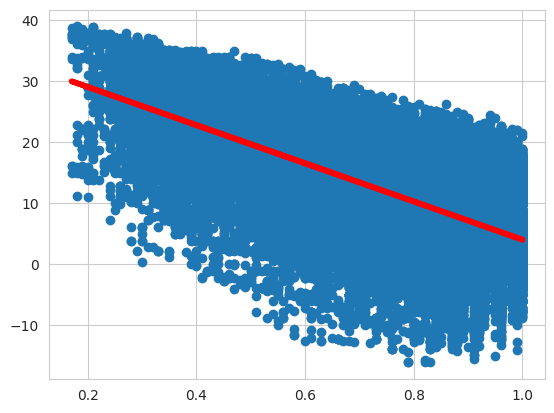

In [51]:
plt.scatter(x_train,y_train)
plt.plot(x_train,Y_hat,lw=4,c='r',label='reg')
plt.show()

### R2 is 0.419 means that we need more features

### second model

In [52]:
# Add 'Visibility' as another feature to the independent variables
x = df[['Humidity','Visibility']]
y = df['Temperature']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [54]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [55]:
Y_hat = reg.predict(x_train)

In [56]:
# LinearRegression_MAE = np.mean(np.absolute(Y_hat - y_test))
LinearRegression_MSE = mean_squared_error(y_train,Y_hat)
LinearRegression_R2 = reg.score(x_train,y_train)
print("R2_adj: ",1 - (1 - LinearRegression_R2) * ((len(y_train) - 1) / (len(y_train) - 3)))
# print("MAE: ",LinearRegression_MAE)
print("MSE: ",LinearRegression_MSE)
print("R2: ",LinearRegression_R2)

R2_adj:  0.44631605685889253
MSE:  49.64078695280585
R2:  0.44633156816824926


changed from 0.419 to 0.446 which indicate how much the new feature is important

### third model

In [57]:
# Add 'Wind_Speed' as another feature to the independent variables
x = df[['Humidity','Visibility','Wind_Speed']]
y = df['Temperature']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [59]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [60]:
Y_hat = reg.predict(x_train)

In [61]:
# LinearRegression_MAE = np.mean(np.absolute(Y_hat - y_test))
LinearRegression_MSE = mean_squared_error(y_train,Y_hat)
LinearRegression_R2 = reg.score(x_train,y_train)
print("R2_adj: ",1 - (1 - LinearRegression_R2) * ((len(y_train) - 1) / (len(y_train) - 4)))
# print("MAE: ",LinearRegression_MAE)
print("MSE: ",LinearRegression_MSE)
print("R2: ",LinearRegression_R2)

R2_adj:  0.4634153219897983
MSE:  48.10707064147139
R2:  0.4634378704067421


R^2 increased again so it it considered an important feature

### forth model

In [62]:
# Add 'Wind_Bearing' and Wind_Speed
x = df[['Humidity','Visibility','Wind_Speed', 'Wind_Bearing']]
y = df['Temperature']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [64]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [65]:
Y_hat = reg.predict(x_train)

In [66]:
# LinearRegression_MAE = np.mean(np.absolute(Y_hat - y_test))
LinearRegression_MSE = mean_squared_error(y_train,Y_hat)
LinearRegression_R2 = reg.score(x_train,y_train)
print("R2_adj: ",1 - (1 - LinearRegression_R2) * ((len(y_train) - 1) / (len(y_train) - 5)))
# print("MAE: ",LinearRegression_MAE)
print("MSE: ",LinearRegression_MSE)
print("R2: ",LinearRegression_R2)

R2_adj:  0.4644862960626305
MSE:  48.01038077980163
R2:  0.4645163006124441


R^2 increased

### fifth model

In [67]:
x = df[['Humidity','Visibility','Wind_Speed','Wind_Bearing','Pressure']]
y = df['Temperature']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [69]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [70]:
Y_hat = reg.predict(x_train)
Y_hat

array([16.18133949, 19.30673016,  5.60352873, ..., 11.84726106,
       20.3557362 , 21.18178289])

In [71]:
# LinearRegression_MAE = np.mean(np.absolute(Y_hat - y_test))
LinearRegression_MSE = mean_squared_error(y_train,Y_hat)
LinearRegression_R2=reg.score(x_train,y_train)
print("R2_adj: ",1 - (1 - LinearRegression_R2) * ((len(y_train) - 1) / (len(y_train) - 6 )))
# print("MAE: ",LinearRegression_MAE)
print("MSE: ",LinearRegression_MSE)
print("R2: ",LinearRegression_R2)

R2_adj:  0.5482945438961814
MSE:  40.496157240966525
R2:  0.5483261799186565


the R^2 slightly increased so the best model with highest $R^2$ and least MSE is using the five features


the accuracy changed from 0.45 (before cleaning) to 0.54 (after cleaning)

# Partial F-Test to check the effectiveness of the features

In [72]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Fit the full model (with both x1 and x2)
model_full = ols('Temperature ~ Humidity + Visibility + Wind_Speed + Wind_Bearing + Pressure', data=df).fit()

# Fit the reduced model (without Pressure)
model_reduced = ols('Temperature ~ Humidity + Visibility + Wind_Speed  + Wind_Bearing', data=df).fit()

f_test = anova_lm(model_reduced, model_full)
print("Pressure test:\n", f_test)

# Fit the reduced model (without Wind_bearing)
model_reduced = ols('Temperature ~ Humidity + Visibility + Wind_Speed + Pressure', data=df).fit()

f_test = anova_lm(model_reduced, model_full)
print("Wind_bearing test:\n", f_test)

# Fit the reduced model (without Wind_speed)
model_reduced = ols('Temperature ~ Humidity + Visibility + Wind_Bearing + Pressure', data=df).fit()

f_test = anova_lm(model_reduced, model_full)
print("Wind_speed test:\n", f_test)

# Fit the reduced model (without Visibility)
model_reduced = ols('Temperature ~ Humidity + Wind_Speed + Wind_Bearing + Pressure', data=df).fit()

f_test = anova_lm(model_reduced, model_full)
print("Visibility test:\n", f_test)

# Fit the reduced model (without Humidity)
model_reduced = ols('Temperature ~ Visibility + Wind_Speed + Wind_Bearing + Pressure', data=df).fit()

f_test = anova_lm(model_reduced, model_full)
print("Humidity test:\n", f_test)

Pressure test:
    df_resid           ssr  df_diff        ss_diff            F  Pr(>F)
0   89236.0  4.275371e+06      0.0            NaN          NaN     NaN
1   89235.0  3.602532e+06      1.0  672838.247578  16666.25476     0.0
Wind_bearing test:
    df_resid           ssr  df_diff      ss_diff         F        Pr(>F)
0   89236.0  3.605261e+06      0.0          NaN       NaN           NaN
1   89235.0  3.602532e+06      1.0  2728.848658  67.59379  2.035627e-16
Wind_speed test:
    df_resid           ssr  df_diff        ss_diff            F  Pr(>F)
0   89236.0  3.875883e+06      0.0            NaN          NaN     NaN
1   89235.0  3.602532e+06      1.0  273351.010445  6770.925398     0.0
Visibility test:
    df_resid           ssr  df_diff        ss_diff            F  Pr(>F)
0   89236.0  3.716918e+06      0.0            NaN          NaN     NaN
1   89235.0  3.602532e+06      1.0  114386.086899  2833.352105     0.0
Humidity test:
    df_resid           ssr  df_diff       ss_diff         

As noticed the effect of Wind bearing on the temperature is very small so we will drop it from features to reduce calculations and save storage.

In [73]:
x = df[['Humidity','Visibility','Wind_Speed','Pressure']]
y = df['Temperature']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

reg = LinearRegression()
reg.fit(x_train,y_train)

Y_hat = reg.predict(x_train)
Y_hat

# LinearRegression_MAE = np.mean(np.absolute(Y_hat - y_test))
LinearRegression_MSE = mean_squared_error(y_train,Y_hat)
LinearRegression_R2=reg.score(x_train,y_train)
print("R2_adj: ",1 - (1 - LinearRegression_R2) * ((len(y_train) - 1) / (len(y_train) - 6 )))
# print("MAE: ",LinearRegression_MAE)
print("MSE: ",LinearRegression_MSE)
print("R2: ",LinearRegression_R2)

R2_adj:  0.5479956777201327
MSE:  40.52295109854724
R2:  0.5480273346742501


# Prediction of test data

In [74]:
x = df[['Humidity', 'Wind_Speed', 'Visibility', 'Pressure']]
y = df[['Temperature']]

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [76]:
reg = LinearRegression()
reg.fit(x_test,y_test)

LinearRegression()

In [77]:
Y_hat = reg.predict(x_test)
perdict = pd.DataFrame(Y_hat)


In [78]:
# Select a random chunk of test data
some_data = x_test.iloc[:5]
some_labels = y_train.iloc[:5]

In [79]:
# Select the same chunk from the actual data
df = df.loc[some_data.index].Temperature

In [80]:
# predict the temperature based on the features in selected test data
print("Predictions:\n", some_data.index,"\n", reg.predict(some_data))

Predictions:
 Index([47320, 37300, 39999, 41793, 33929], dtype='int64') 
 [[ 0.69842336]
 [14.81727812]
 [12.88248524]
 [11.04249747]
 [13.69210163]]


In [81]:
# Compare the results with the actual data 
print("Labels:\n", df)

Labels:
 47320    -4.038889
37300    -3.894444
39999    16.155556
41793    14.716667
33929     7.222222
Name: Temperature, dtype: float64


The residuals between the predicted data and actual one is logical as the accuracy of the model(R^2 adj) is 55% so the model has error precentage about 45%